In [1]:
import scipy as sp
#from scipy import integrate
import numpy as np
from sympy import *
init_printing(use_unicode=True)

In [28]:
#tex PREAMBLE

import matplotlib.pyplot as plt
from matplotlib import rc
#******************************************************

rc('font',**{'family':'serif','serif':['Times']})
## for Palatino and other serif fonts use:
#rc('font',**{'family':'serif','serif':['Palatino']})
rc('text', usetex=True)

#LaTeX
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

#*******************************************************

# 1. Volume of 3D sphere

In [31]:
a, r, theta, phi, R = symbols('a r \\theta \\phi R', positive=True)
#si no le decimos que A, r y R son positivos, se va a congelar

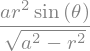

In [34]:
exp=((a*(r**2)*sin(theta))/(sqrt(a**2-r**2)))
exp

In [35]:
expr=integrate(((a*(r**2)*sin(theta))/(sqrt(a**2-r**2))), (r, 0, R), (theta,0,pi), (phi,0,(2*pi)))

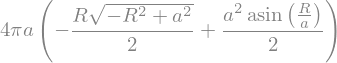

In [36]:
expr

## Resultado

In [37]:
expr.subs(R,a)

# 2. Line element of 3D sphere

#### Una 3-esfera enclavada en un espacio euclideo 4-dimensional está descrita por la ecuación:

$x^2+y^2+z^2+w^2=a^2$ donde $a$ es el "radio" de la esfera.

Notemos la necesidad de usar cuatro coordenadas espaciales $x^k=\{x,y,z,w\}$

#### El desplazamiento infinitesimal $d\ell^2$ sobre esta geometría es:

\begin{equation}
d\ell^2(S^3)=d\vec{x}^2+dw^2
\end{equation}

#### Si reescalamos $x^k \rightarrow ax^k$, nos queda:

\begin{equation}
d\ell^2(S^3)=a^2[d\vec{x}^2+dw^2]
\end{equation}

las coordenadas $x^k$ "ceden" su dimensión de longitud al elemento $a$

#### Sin embargo, ahora que transferimos la dimensión de longitud al elemento $a$, las unicas coordenadas que mantienen sentido fisico son las coordenadas de la 3-variedad $\vec{x}=x^i$. 

Mientras que la entrada $x^4=w$ de las coordenadas ha perdido su sentido físico. Podemos expresar la ecuación anterior únicamente en términos de $\vec{x}$. Usemos la derivada

\begin{equation*}
\begin{split}
 d (\vec{x}^2 \pm w^2 = 1) \quad \rightarrow \quad d(\vec{x}^2) &\pm d(w^2) = 0 \\
                               2 \vec{x} \cdot d\vec{x} &\pm 2 w \cdot dw = 0 \\
                                         %   \vec{x} \cdot d\vec{x} \pm w \cdot dx &= 0 \\
                                           w \cdot dw &= \mp \vec{x} \cdot d \vec{x} \\
                             \rightarrow   \quad dw^2 &= \frac{ (\vec{x} \cdot d \vec{x})^2}{w^2} \\
                             \therefore    \quad dw^2 &= \frac{ (\vec{x} \cdot d \vec{x})^2}{1 \mp \vec{x}^2} 
\end{split}
\end{equation*}

Tal que el elemento de línea nos queda:

\begin{equation}
 d\ell^2 = a^2 \left[d\vec{x}^2 + \frac{ (\vec{x} \cdot d \vec{x})^2}{1 - \vec{x}^2}  \right]
\end{equation}

#### Transformando a un sistema coordenado esférico $(r,\theta,\phi)$:

\begin{equation*}
\begin{split}
 &d\vec{x}^2=dr^2+r^2\left(d\theta^2+\sin^2\theta d\phi^2\right)\\
 &\vec{x} \cdot d\vec{x} = r dr \\
 &d\Omega^2\equiv d\theta^2 + \sin^2\theta d\phi^2 
\end{split}
\end{equation*}

Y el elemento de línea queda de la forma:

\begin{equation}
d\ell^2= a^2 \left[\frac{dr^2}{1 -kr^2} +r^2d\Omega^2\right]
\end{equation}


#### Es conveniente normalizar$^*$ la coordenada radial, 
\begin{equation}
 d\chi \equiv \frac{dr}{\sqrt{1-kr^2}} \quad \Rightarrow \quad \chi = \int_0^r \frac{dr^{\prime}}{\sqrt{1-k{r^{\prime}}^2}}
\label{eq:chi}
\end{equation}

para que el elemento de línea esté expresado en lo que se conocen como coordenadas comoviles $\chi$

\begin{equation}
d\ell^2 = a^2 \left[d\chi^2 + F_k^2(\chi) d\Omega^2 \right]
\end{equation}


donde
\begin{equation}
F_k(\chi)\equiv \sin(\chi)
\end{equation}

$^*$Notemos que  $\chi=r$ cuando $k=0$ y la métrica regresa a su forma estándar. En este caso k tiene un valor de +1 pues estamos en la hiperesfera S3

### Por lo que el elemento de línea puede expresarse como:

\begin{equation*}
\begin{split}
 d\ell^2 &= a^2 \left[d\chi^2 + sin^2(\chi) d\Omega^2 \right]\\
  &=a^2 \left[d\chi^2 + sin^2(\chi)\left(d\theta^2+sin^2(\theta) d\phi^2 \right) \right]
 \end{split}
\end{equation*}


#### El área superficial de una n-esfera inmersa en un espacio n+1 dimensional está dado por:

\begin{equation}
S_{n+1}=2\pi V_n
\end{equation}

Donde $V_n$ es el volumen de la n-bola

Fuente: [https://en.wikipedia.org/wiki/N-sphere]

In [30]:
a, chi, theta, phi, chi_0 = symbols('a \\chi \\theta \\phi \\chi_0', positive=True)

In [70]:
expr2=integrate((a**2*cos(chi)), (chi, 0, chi_0), (theta,0,pi), (phi,0,(2*pi)))
expr22=expand_trig(expr2)
print('el area superficial es:')
expr22

el area superficial es:


Para calcular el volumen total del espacio en 3D basta con que integremos la expresión (fuente: [https://en.wikipedia.org/wiki/3-sphere])

\begin{equation}
dV=a^3(sin^2(\chi)sin(\theta))
\end{equation}

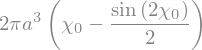

In [57]:
expr3=integrate((a**3*(sin(chi)**2)*sin(theta)), (chi, 0, chi_0), (theta,0,pi), (phi,0,(2*pi)))
simplify(expr3)

# 3. Line element to Minkowski

Tenemos el elemento de línea

\begin{equation}
    ds^2=(c^2-a^2t^2)dt^2-2at dt dx -dx^2 -dy^2 -dz^2
\end{equation}

\begin{gather}
 g_{\mu \nu} 
 = 
 \begin{bmatrix} (c^2-a^2t^2)& -at & 0 & 0 \\
                  -at &-1 & 0 & 0 \\
                  0 & 0 & -1 & 0 \\
                  0 & 0 & 0 &-1
 \end{bmatrix} 
\end{gather}

Notemos que haciendo la transformación $x^{\prime}=at^2/4$, tendremos:

\begin{gather}
 g_{\mu \nu} 
 = \text{diag}(1, -1, -1, -1) 
\end{gather}